<a href="https://colab.research.google.com/github/CarolBigData2016/google-colab/blob/master/01TF_CH4_3_point_by_point_intro_to_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to TensorFlow, fitting point by point

In this notebook, we introduce TensorFlow by fitting a line of the form y=m\*x+b point by point. This is a derivation of Jared Ostmeyer's [Naked Tensor](https://github.com/jostmey/NakedTensor/) code. 

#### Load dependencies and set seeds for reproducibility

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.set_random_seed(42)

#### Create a very small data set

In [0]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

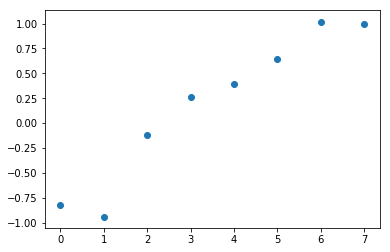

In [0]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)
# we see that there is a liniear coordination between these points. This we want to learn with tensor flow.

#### Define *variables* -- the model parameters we'll learn -- and initialize them with "random" values

In [0]:
# m will be the slope of the line. We can see that it will have a positive slope, never the less, we will initiate it with a neg. slope value.
# b the intercept also needs to be defined, set it to 1. It doesn't really matter what you set these 2 values to, close to zero is fine.
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

#### One single point at a time, define the error between the true label and the model's prediction of the label

In [0]:
# Let's compute the quadratic cost, although we know, it's not quiet accurate.
# start with a total error of 0
total_error = 0.0
# zip x and y together, so we can work with the values side-by-side in a single object
for x,y in zip(xs, ys):
    y_model = m*x + b # the predicted model output here y_model; but also often called y_hat
    total_error += (y-y_model)**2 # sum of squared error between true and predicted y; the "cost" is to be minimized

#### Define optimizer as SSE-minimizing gradient descent

In [6]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 
# illustrate learning rate too high: 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(total_error) 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(total_error) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Define an operator that will initialize the graph with all available global variables

In [0]:
initializer_operation = tf.global_variables_initializer()

#### With the computational graph designed, we initialize a session to execute it

In [0]:
with tf.Session() as session:
    
    session.run(initializer_operation) 
        
    n_epochs = 1000 # run notebook through with 10, then run again with 1000
    for iteration in range(n_epochs):
        session.run(optimizer_operation) # this line executes the graph once, taking a single step toward minimizing cost
    
    slope, intercept = session.run([m, b])  # fetch the m and b operators

In [9]:
slope

0.29314372

In [10]:
intercept

-0.84175235

#### Calculate the predicted model outputs given the inputs xs

In [0]:
y_hat = intercept + slope*np.array(xs)
# need to use np.array to fix the xs together

In [12]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330823
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


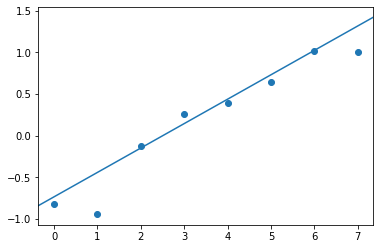

In [13]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])